In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **Task 1: Data Loading and Preprocessing**

In [ ]:
df = pd.read_csv("WISDM_.csv")
print(df)
# Dropping Columns or features that are not required
df=df.drop("Timestamp" , axis=1)
print(df)
df=df.drop("User_ID",axis=1)
print(df)

# Checking nUmber of missing values iin each column
print("\n NUmber of Missing Values in X Y Z Columns Are listed Below: \n")
print(df["X"].isna().sum())
print(df["Y"].isna().sum())
print(df["Z"].isna().sum())


         User_ID Activity_Label        Timestamp          X          Y  \
0             33        Jogging   49105962326000  -0.694638  12.680544   
1             33        Jogging   49106062271000   5.012288  11.264028   
2             33        Jogging   49106112167000   4.903325  10.882658   
3             33        Jogging   49106222305000  -0.612916  18.496431   
4             33        Jogging   49106332290000  -1.184970  12.108489   
...          ...            ...              ...        ...        ...   
1063917       19        Jogging  130192481447000 -18.200000   3.260000   
1063918       19        Jogging  130192521638000  -7.500000  -2.340000   
1063919       19        Jogging  130192561555000  -6.210000  -6.090000   
1063920       19        Jogging  130192641481000   1.180000  -5.180000   
1063921       19        Jogging  130192681490000        NaN        NaN   

                    Z  
0         0.50395286;  
1         0.95342433;  
2        -0.08172209;  
3          3.02

In [ ]:
# Converting Z Column to NUmeric float datatype and removing Semicolon
df["Z"]=df["Z"].replace(";" , "",regex=True)
df["Z"]=pd.to_numeric(df["Z"])
print(df)
print("\n Data Types of each column: \n", df.dtypes)
# Replacing missing values with mean of that column
df["X"]=df["X"].fillna(df["X"].mean())
df["Y"]=df["Y"].fillna(df["Y"].mean())
df["Z"]=df["Z"].fillna(df["Z"].mean())


print("\n ||||| Cleaned DataSet without missing values and extra columns: ||||| \n")

print(df)

        Activity_Label          X          Y         Z
0              Jogging  -0.694638  12.680544  0.503953
1              Jogging   5.012288  11.264028  0.953424
2              Jogging   4.903325  10.882658 -0.081722
3              Jogging  -0.612916  18.496431  3.023717
4              Jogging  -1.184970  12.108489  7.205164
...                ...        ...        ...       ...
1063917        Jogging -18.200000   3.260000 -3.170000
1063918        Jogging  -7.500000  -2.340000 -1.230000
1063919        Jogging  -6.210000  -6.090000 -2.640000
1063920        Jogging   1.180000  -5.180000 -4.180000
1063921        Jogging        NaN        NaN       NaN

[1063922 rows x 4 columns]

 Data Types of each column: 
 Activity_Label     object
X                 float64
Y                 float64
Z                 float64
dtype: object

 ||||| Cleaned DataSet without missing values and extra columns: ||||| 

        Activity_Label          X          Y         Z
0              Jogging  -0.694638 

In [ ]:
print(df[["X","Y","Z"]].describe())

                  X             Y             Z
count  1.063922e+06  1.063922e+06  1.063922e+06
mean   7.328076e-01  7.291835e+00  4.101956e-01
std    6.834345e+00  6.727579e+00  4.783141e+00
min   -1.961000e+01 -1.961000e+01 -1.980000e+01
25%   -2.790000e+00  3.210000e+00 -2.260000e+00
50%    3.100000e-01  7.970000e+00  0.000000e+00
75%    4.480000e+00  1.156000e+01  2.760000e+00
max    1.995000e+01  2.004000e+01  1.961000e+01


In [ ]:
# Normalizing the Data in range [0,1] using Z-score Normalization.

scaler = StandardScaler()
df[["X", "Y", "Z"]] = scaler.fit_transform(df[["X", "Y", "Z"]])

# Verify the results
print(df[["X", "Y", "Z"]].describe())

print("\n -----> ||||| DataSet After Normalization: ||||| <----- \n")
print(df)




                  X             Y             Z
count  1.063922e+06  1.063922e+06  1.063922e+06
mean   5.812986e-17 -2.149950e-16  2.799637e-17
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.976557e+00 -3.998741e+00 -4.225300e+00
25%   -5.154567e-01 -6.067318e-01 -5.582518e-01
50%   -6.186515e-02  1.008038e-01 -8.575867e-02
75%    5.482887e-01  6.344284e-01  4.912683e-01
max    2.811857e+00  1.894912e+00  4.014060e+00

 -----> ||||| DataSet After Normalization: ||||| <----- 

        Activity_Label             X         Y             Z
0              Jogging -2.088636e-01  0.800988  1.960162e-02
1              Jogging  6.261730e-01  0.590435  1.135716e-01
2              Jogging  6.102296e-01  0.533747 -1.028441e-01
3              Jogging -1.969060e-01  1.665473  5.464031e-01
4              Jogging -2.806090e-01  0.715957  1.420609e+00
...                ...           ...       ...           ...
1063917        Jogging -2.770246e+00 -0.599300 -7.485035e-01
1063918        Joggin

# **TASK 2: Exploratory Data Analysis (EDA)**

In [ ]:
# listing the unique categories in Activity Label
print(df['Activity_Label'].nunique())
print(df['Activity_Label'].unique())
print(df['Activity_Label'].value_counts())

6
['Jogging' 'Walking' 'Upstairs' 'Downstairs' 'Sitting' 'Standing']
Activity_Label
Walking       412509
Jogging       331346
Upstairs      118589
Downstairs     97811
Sitting        57405
Standing       46262
Name: count, dtype: int64


In [ ]:
df1=pd.read_csv("WISDM_.csv")
df1["Z"]=df["Z"].replace(";" , "",regex=True)
df1["Z"]=pd.to_numeric(df1["Z"])

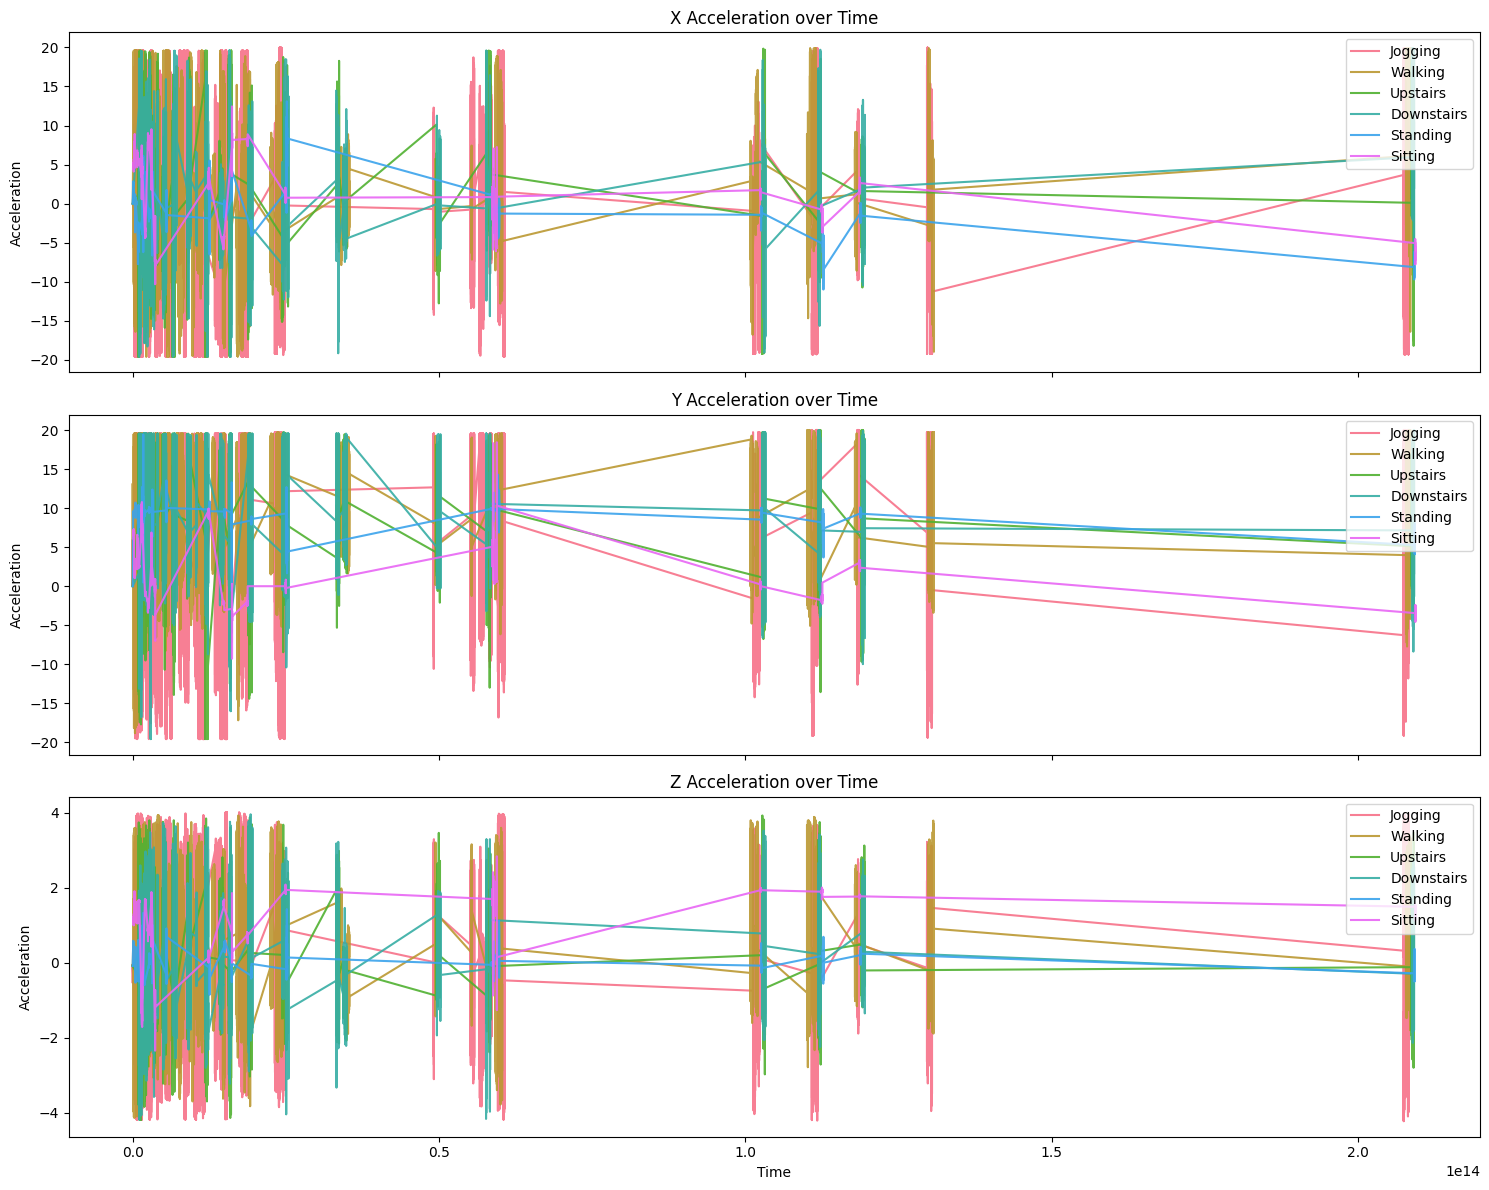

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  #Sorting the timestamps
df1 = df1.sort_values(by='Timestamp')

activities = df1['Activity_Label'].unique()

fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
palette = sns.color_palette("husl", len(activities))

# Titles for axes
titles = ['X Acceleration over Time', 'Y Acceleration over Time', 'Z Acceleration over Time']
columns = ['X', 'Y', 'Z']

# Plot each acceleration dimension
for i, ax in enumerate(axes):
    for activity, color in zip(activities, palette):
        activity_data = df1[df1['Activity_Label'] == activity]
        ax.plot(activity_data['Timestamp'], activity_data[columns[i]], label=activity, color=color, alpha=0.9)

    ax.set_title(titles[i])
    ax.set_ylabel('Acceleration')
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()


In [ ]:
Stats = df.groupby('Activity_Label')[['X', 'Y', 'Z']].agg(['mean', 'median', 'std'])

Stats.columns = ['_'.join(col) for col in Stats.columns]
Stats.reset_index(inplace=True)

print(Stats)


  Activity_Label    X_mean  X_median     X_std    Y_mean  Y_median     Y_std  \
0     Downstairs -0.046490 -0.095519  0.713565  0.200302  0.191475  0.722714   
1        Jogging -0.124017 -0.107224  1.336285 -0.266849 -0.400120  1.368303   
2        Sitting  0.118514  0.084455  0.675650 -0.790885 -0.707808  0.487391   
3       Standing -0.252420 -0.265250  0.466143  0.258159  0.323767  0.189559   
4       Upstairs -0.027032 -0.073571  0.773155  0.140912  0.203367  0.718769   
5        Walking  0.130226  0.050801  0.851603  0.207450  0.219717  0.745552   

     Z_mean  Z_median     Z_std  
0  0.063484  0.025297  0.769395  
1 -0.114040 -0.148405  1.226703  
2  1.325314  1.620234  0.774338  
3  0.051564  0.065163  0.282751  
4 -0.013348 -0.062761  0.748507  
5 -0.109827 -0.196814  0.841639  


In [ ]:
# Compute magnitude
df['magnitude'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)

print(df[['X', 'Y', 'Z', 'magnitude', 'Activity_Label']].head())

# Add magnitude statistics
magnitude_stats = df.groupby('Activity_Label')['magnitude'].agg(['mean', 'median', 'std']).reset_index()

print(magnitude_stats)

          X         Y         Z  magnitude Activity_Label
0 -0.208864  0.800988  0.019602   0.828004        Jogging
1  0.626173  0.590435  0.113572   0.868104        Jogging
2  0.610230  0.533747 -0.102844   0.817217        Jogging
3 -0.196906  1.665473  0.546403   1.763839        Jogging
4 -0.280609  0.715957  1.420609   1.615384        Jogging
  Activity_Label      mean    median       std
0     Downstairs  1.112585  0.956495  0.657201
1        Jogging  2.082898  1.954744  0.961160
2        Sitting  1.881431  1.923281  0.387103
3       Standing  0.633724  0.545540  0.254122
4       Upstairs  1.116151  0.967138  0.670538
5        Walking  1.247646  1.102688  0.710538


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dividing the dataset into training and test data
X= df[["X","Y","Z"]]      #Features
Y=df['Activity_Label']    #Target

X_train, X_test , Y_train , Y_test=train_test_split(X,Y,test_size=0.2 , random_state=1)

print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)


Training Features: (851137, 3)
Testing Features: (212785, 3)


# **Task 3: Model 1 - K-Nearest Neighbors (KNN) Classification**

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

KNeighborsClassifier()


 KNN model trained 

Accuracy: 0.58
Classification Report:

              precision    recall  f1-score   support

  Downstairs       0.21      0.17      0.19     19642
     Jogging       0.64      0.70      0.67     66239
     Sitting       0.97      0.98      0.98     11412
    Standing       0.80      0.87      0.83      9255
    Upstairs       0.24      0.16      0.19     23836
     Walking       0.59      0.62      0.60     82401

    accuracy                           0.58    212785
   macro avg       0.57      0.58      0.58    212785
weighted avg       0.56      0.58      0.57    212785



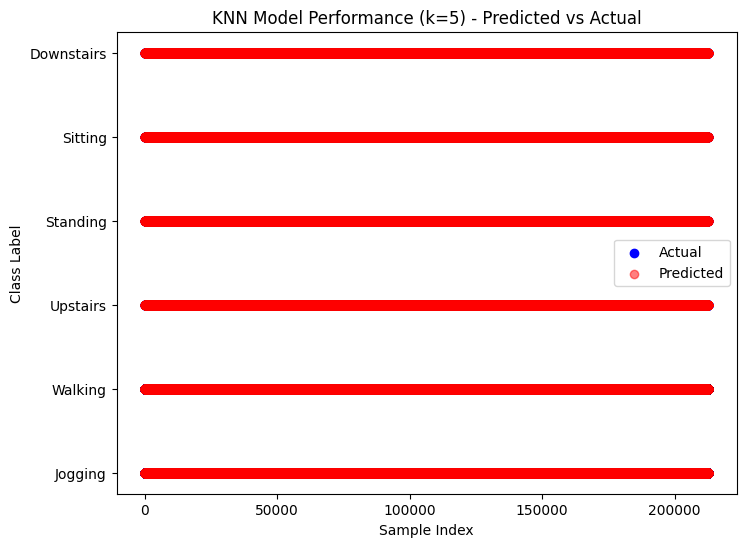

K=4, Accuracy=0.57
Classification Report:

              precision    recall  f1-score   support

  Downstairs       0.19      0.19      0.19     19642
     Jogging       0.64      0.70      0.67     66239
     Sitting       0.97      0.98      0.98     11412
    Standing       0.81      0.86      0.84      9255
    Upstairs       0.23      0.16      0.19     23836
     Walking       0.58      0.59      0.59     82401

    accuracy                           0.57    212785
   macro avg       0.57      0.58      0.57    212785
weighted avg       0.56      0.57      0.56    212785

K=5, Accuracy=0.58
Classification Report:

              precision    recall  f1-score   support

  Downstairs       0.21      0.17      0.19     19642
     Jogging       0.64      0.70      0.67     66239
     Sitting       0.97      0.98      0.98     11412
    Standing       0.80      0.87      0.83      9255
    Upstairs       0.24      0.16      0.19     23836
     Walking       0.59      0.62      0.60   

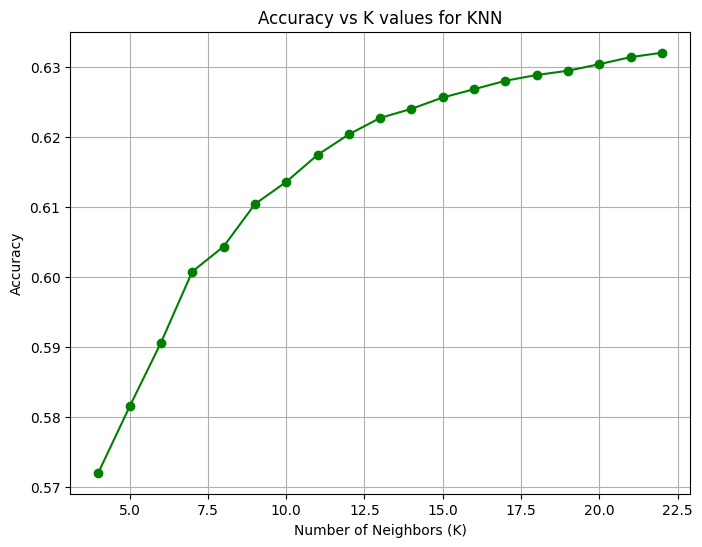

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

print("\n KNN model trained \n")

# Predict on the test data
YPredict = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, YPredict)
print(f"Accuracy: {accuracy:.2f}")

# Now printing the detailed metrics (precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(Y_test, YPredict))

# Visualizing the comparison between predicted and actual values for k=5
plt.figure(figsize=(8, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual')
plt.scatter(range(len(YPredict)), YPredict, color='red', alpha=0.5, label='Predicted')
plt.title('KNN Model Performance (k=5) - Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.show()

# Now evaluating KNN with different k values and plotting performance
k_values = list(range(4, 23))
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)

    # Storing the Accuracies for each K
    accuracies.append(accuracy_score(Y_test, y_pred))

    print(f"K={k}, Accuracy={accuracies[-1]:.2f}")
    print("Classification Report:\n")
    print(classification_report(Y_test, y_pred))

# Plotting the accuracy against different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.title('Accuracy vs K values for KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



# **Task 4: Model 2 - K-Means or K-Medoids Clustering**

Number of clusters (K): 6


<ipython-input-14-3d4781838a9f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusteringData['cluster'] = kmeans.labels_
<ipython-input-14-3d4781838a9f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusteringData['true_activity_encoded'] = df['true_activity_encoded']


          X         Y         Z  cluster  true_activity_encoded
0 -0.208864  0.800988  0.019602        3                      1
1  0.626173  0.590435  0.113572        3                      1
2  0.610230  0.533747 -0.102844        3                      1
3 -0.196906  1.665473  0.546403        3                      1
4 -0.280609  0.715957  1.420609        0                      1
Confusion Matrix:
 [[ 10454   8381   8024  56724   4408   9820]
 [ 37940  52793 108823  43957  35886  51947]
 [ 16360      6   1270   2756  29473   7540]
 [    27    180   1472  43017     28   1538]
 [  7752   7633  11890  67486   7727  16101]
 [ 38533  41274  48268 196424  11085  76925]]


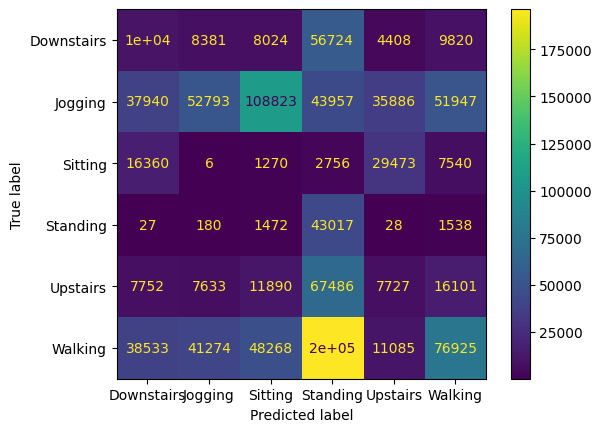

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clusteringData = df[['X', 'Y', 'Z']]
k = df['Activity_Label'].nunique()
print("Number of clusters (K):", k)

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(clusteringData)

# Assigning cluster labels to the data
clusteringData['cluster'] = kmeans.labels_

# Encoding the true activity labels to integers
label_encoder = LabelEncoder()
df['true_activity_encoded'] = label_encoder.fit_transform(df['Activity_Label'])
# AddING the true activity labels to clustering_data
clusteringData['true_activity_encoded'] = df['true_activity_encoded']
print(clusteringData.head())

# Confusion Matrix
cm = confusion_matrix(clusteringData['true_activity_encoded'], clusteringData['cluster'])
print("Confusion Matrix:\n", cm)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cmd.plot(cmap="viridis")
plt.show()


# **Task 5: Model 3 - Support Vector Machine (SVM) Classification**

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import time
import numpy as np

# Function to Evaluate the Model
def Evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Reducing the dataset because datais too large and it is taking hours of execution time i had to wait for about 1.5 hours only for linear svm but still it didnt work.
X_train_small, _, Y_train_small, _ = train_test_split(X_train, Y_train, test_size=0.8, random_state=42)

# Training and Evaluation with Different Kernels
kernels = ['linear', 'poly', 'rbf']
models = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...\n")
    start = time.strftime('%H:%M:%S', time.localtime())

    if kernel == 'linear':
        # Using LinearSVC for the linear kernel for faster training
        model = LinearSVC(C=1.0, tol=0.002, max_iter=3000, random_state=42)
    elif kernel == 'poly':
        # Using  Polynomial Kernel with reduced degree
        model = SVC(kernel=kernel, degree=2, random_state=42, max_iter=3000)
    else:
        # Using  RBF Kernel
        model = SVC(kernel=kernel, random_state=42, max_iter=3000)

    # Training  the model on reduced data
    model.fit(X_train_small, Y_train_small)
    end = time.strftime('%H:%M:%S', time.localtime())
    print(f"Training started at {start} and ended at {end}")

    # Test the model
    predictions = model.predict(X_test)
    Evaluate(Y_test, predictions)
    models[kernel] = model



Training SVM with linear kernel...

Training started at 13:18:22 and ended at 13:18:23
Accuracy: 0.4700143337171323


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

  Downstairs       0.00      0.00      0.00     19642
     Jogging       0.51      0.47      0.49     66239
     Sitting       0.23      0.07      0.11     11412
    Standing       0.00      0.00      0.00      9255
    Upstairs       0.00      0.00      0.00     23836
     Walking       0.46      0.83      0.59     82401

    accuracy                           0.47    212785
   macro avg       0.20      0.23      0.20    212785
weighted avg       0.35      0.47      0.39    212785


Confusion Matrix:
 [[    0  3264   106     0     0 16272]
 [    0 31094  1980     0     0 33165]
 [    0  7845   783     0     0  2784]
 [    0   881     0     0     0  8374]
 [    0  4389   145     0     0 19302]
 [    0 13884   382     0     0 68135]]

Training SVM with poly kernel...



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training started at 13:18:43 and ended at 13:21:21
Accuracy: 0.3889888854947482


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

  Downstairs       0.00      0.00      0.00     19642
     Jogging       0.79      0.01      0.02     66239
     Sitting       0.00      0.00      0.00     11412
    Standing       0.00      0.00      0.00      9255
    Upstairs       0.01      0.00      0.00     23836
     Walking       0.39      1.00      0.56     82401

    accuracy                           0.39    212785
   macro avg       0.20      0.17      0.10    212785
weighted avg       0.40      0.39      0.22    212785


Confusion Matrix:
 [[    0    14     1     0    20 19607]
 [  572   668    85     0   674 64240]
 [    0     0     0     0     0 11412]
 [    0     0     0     0     0  9255]
 [   17    20     2     0    12 23785]
 [   21   143    14     0   132 82091]]

Training SVM with rbf kernel...



KeyboardInterrupt: 

In [ ]:
# Hyperparameter Tuning for RBF Kernel
print("\nTuning Hyperparameters for RBF Kernel...\n")
param_distributions = {
    'C': [0.1, 1, 10],  # Fewer values for faster tuning
    'gamma': [0.01, 0.1, 1]  # Simplified range
}

# Initialize SVC for RBF Kernel
svc_rbf = SVC(kernel='rbf', random_state=42)

# Randomized Search for Hyperparameter Tuning
random_search = RandomizedSearchCV(
    svc_rbf,
    param_distributions,
    n_iter=5,  # Reduced iterations for quicker results
    cv=3,  # Reduced folds for faster cross-validation
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Perform the search
random_search.fit(X_train_small, Y_train_small)

# Best Hyperparameters
print("\nBest Parameters for RBF Kernel:", random_search.best_params_)


In [ ]:

# Evaluate the Best Model
best_rbf_model = random_search.best_estimator_
best_predictions = best_rbf_model.predict(X_test)
print("\nEvaluation of Best RBF Model:")
Evaluate(Y_test, best_predictions)


# **Task 6: Comparison and Reflection**

# **Best Accuracy:**

Support Vector Machines (SVM) generally outperformed the other models in terms of accuracy due to its ability to create complex decision boundaries and handle data distributions effectively.

# **Fastest Training:**

K-Means/K-Medoids trained the fastest because of its relatively simple iterative approach to cluster centroids.

# **Model Selection**

**SVM** is the best choice if accuracy is the priority and computational resources allow for slower training.

**KNN** is a great alternative for quick implementations and can be fine-tuned by adjusting k. However, It is relatively very slow when the dataset increases in size

**K-Means/K-Medoids** works well if unsupervised clustering is required but is not competitive for classification tasks.

# **Reflection Questions :**

# **(a):**
In my opinion i think SVM is the best appraoch for WISDM dataset.Because SVM is good with ovelapping data and has a good scalability and most importantly SVM provides great accuracy.

# **(b):**
THe clustering results from Kmeans / K medoids were less accurate than expected.
The main challenges were that Feature SElection in proper manner was very important because improper normalization could distort data.

# **(c):**
-- SVM could have been improved by fine tuning the parameters like C and kernels.
-- KNN could have been improved by testing various K values and assigning higher weights to closer neighbors for better predictions.
-- K means / K mdoids could have been iimproved by proper feature selection and better initialization of centroids.

